<a href="https://colab.research.google.com/github/jalalbamniya/DataSet/blob/main/data_pre_processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/archive (13).zip')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df = df.fillna(0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df1 = pd.read_csv('/content/heart4.csv')
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df1['target'].unique()

array([1, 0])

In [ ]:
vals = df.values
symptoms = df1['target'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['target'] == symptoms[i]]['fbs'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

NameError: ignored

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
data = df.iloc[:,1:].values
labels = df['target'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(257, 13) (46, 13) (257,) (46,)


In [ ]:
x_test

array([[0.00e+00, 0.00e+00, 1.30e+02, 2.64e+02, 0.00e+00, 0.00e+00,
        1.43e+02, 0.00e+00, 4.00e-01, 1.00e+00, 0.00e+00, 2.00e+00,
        1.00e+00],
       [1.00e+00, 3.00e+00, 1.34e+02, 2.04e+02, 0.00e+00, 1.00e+00,
        1.62e+02, 0.00e+00, 8.00e-01, 2.00e+00, 2.00e+00, 2.00e+00,
        0.00e+00],
       [1.00e+00, 0.00e+00, 1.20e+02, 1.77e+02, 0.00e+00, 1.00e+00,
        1.40e+02, 0.00e+00, 4.00e-01, 2.00e+00, 0.00e+00, 3.00e+00,
        1.00e+00],
       [1.00e+00, 0.00e+00, 1.22e+02, 2.86e+02, 0.00e+00, 0.00e+00,
        1.16e+02, 1.00e+00, 3.20e+00, 1.00e+00, 2.00e+00, 2.00e+00,
        0.00e+00],
       [1.00e+00, 0.00e+00, 1.40e+02, 2.26e+02, 0.00e+00, 1.00e+00,
        1.78e+02, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 2.00e+00,
        1.00e+00],
       [1.00e+00, 1.00e+00, 1.60e+02, 2.46e+02, 0.00e+00, 1.00e+00,
        1.20e+02, 1.00e+00, 0.00e+00, 1.00e+00, 3.00e+00, 1.00e+00,
        0.00e+00],
       [0.00e+00, 2.00e+00, 1.20e+02, 2.09e+02, 0.00e+00, 1.00e+00,
  

In [ ]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
X = df1.drop("oldpeak", axis="columns")
Y = df1.drop("target", axis="columns")
print("shape of X =",X.shape)
print("shape of Y=",Y.shape)

shape of X = (303, 13)
shape of Y= (303, 13)


In [ ]:
x = df1.iloc[:,0:1].values
y = df1.iloc[:, 1].values

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size = 0.2, random_state=100)
# print("shape of X_train =",X.shape)
# print("shape of X_test =",Y.shape)
# print("shape of Y_train =",X.shape)
# print("shape of Y_test =",Y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 13)
(61, 13)


In [ ]:
from sklearn.linear_model import LinearRegression
Ir = LinearRegression()
Ir.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = Ir.predict(x_test)

In [ ]:
preds = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


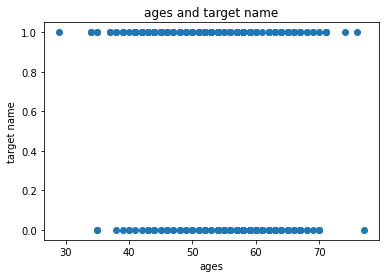

In [ ]:
plt.scatter(x =df.age, y = df.target)
plt.xlabel("ages")
plt.ylabel("target name")
plt.title("ages and target name")
plt.show()